In [18]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics.cluster import normalized_mutual_info_score


In [24]:
tree = uproot.open("provaRansacFill.root")['trackTree'].arrays()

# tree['IdentificationMap']
# tree

/home/lorenzo/.local/lib/python3.8/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


In [25]:
keys = np.asarray(tree[b"identificationMap.first"])
value = np.asarray(tree[b"identificationMap.second"])

value = value.reshape(100,9)

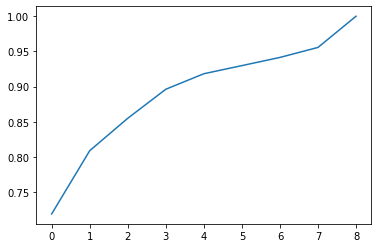

In [26]:
plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lst[-1]) for lst in value for i in lst]).reshape(100,9)).mean())

plt.show()

## Comparison Hough Ransac

In [27]:
treeHough = uproot.open("100EventsHough.root")['trackTree'].arrays()
treeRansac = uproot.open("100RansacFixed.root")['trackTree'].arrays()

/home/lorenzo/.local/lib/python3.8/site-packages/awkward/array/base.py:394: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return cls.numpy.array(value, copy=False)


In [29]:
valueHough = np.asarray(treeHough[b"identificationMap.second"]).reshape(100,64)
valueRansac = np.asarray(treeRansac[b"identificationMap.second"]).reshape(100,9)

targetRansac = pd.DataFrame(valueRansac).iloc[:,-1]

In [30]:
# # check lengths 
# valueHough = np.asarray(treeHough[b"identificationMap.second"]).reshape(1,25)
# [j.shape  for i in valueHough for j in i]
# 
# 
# valueRansac = np.asarray(treeRansac[b"IdentificationMap.second"]).reshape(100,9)
# pd.DataFrame(np.asarray([j.shape  for i in valueRansac for j in i]).reshape(100,9)).iloc[:2,-1]
# 
# 
# targetRansac = pd.DataFrame(valueRansac).iloc[:2,-1]
# [i.shape for i in targetRansac]

#[lstR.shape for lstH, lstR in zip(valueHough, targetRansac) for i in lstH]

pd.DataFrame(np.array([j.shape for i in valueHough for j in i]).reshape(100,64))



,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,1411,1411,1411,1411,1411,1411,1411,1411,1411,1411,...,1411,1411,1411,1411,1411,1411,1411,1411,1411,1411
1,1398,1398,1398,1398,1398,1398,1398,1398,1398,1398,...,1398,1398,1398,1398,1398,1398,1398,1398,1398,1398
2,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777,...,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777
3,749,749,749,749,749,749,749,749,749,749,...,749,749,749,749,749,749,749,749,749,749
4,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373,...,1373,1373,1373,1373,1373,1373,1373,1373,1373,1373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383,...,1383,1383,1383,1383,1383,1383,1383,1383,1383,1383
96,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310,...,1310,1310,1310,1310,1310,1310,1310,1310,1310,1310
97,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661,...,1661,1661,1661,1661,1661,1661,1661,1661,1661,1661
98,892,892,892,892,892,892,892,892,892,892,...,892,892,892,892,892,892,892,892,892,892


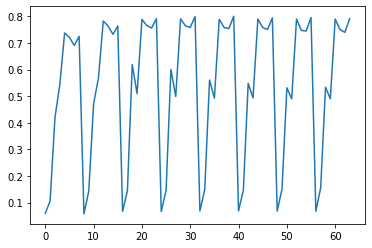

In [33]:
# plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lst[-1]) for lst in value for i in lst]).reshape(100,9)).mean())
plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lstR) for lstH, lstR in zip(valueHough, targetRansac) for i in lstH]).reshape(100,64)).mean())

In [34]:
dfRes = pd.DataFrame(results.reshape(100,64))
dfRes

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4.430649e-02,1.825615e-01,3.562524e-01,2.586091e-01,5.732111e-01,6.028568e-01,5.658525e-01,6.039792e-01,4.781138e-02,1.825615e-01,...,8.298925e-01,8.573103e-01,4.919638e-02,6.161595e-02,5.196089e-01,3.811394e-01,8.335716e-01,8.273057e-01,8.432943e-01,8.584102e-01
1,1.000000e+00,5.492206e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.574851e-16,2.368170e-16,1.000000e+00,3.720845e-15,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.945356e-16,0.000000e+00,6.114444e-16,0.000000e+00,0.000000e+00,0.000000e+00
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,0.000000e+00,0.000000e+00,1.613777e-01,2.739107e-01,4.568683e-01,4.494949e-01,4.420205e-01,4.354150e-01,0.000000e+00,4.610444e-02,...,3.434039e-01,3.551897e-01,0.000000e+00,1.371256e-02,2.517804e-01,4.804436e-01,3.193586e-01,2.964355e-01,3.823577e-01,3.551897e-01
4,4.090985e-02,0.000000e+00,4.833938e-01,4.610255e-01,7.178334e-01,6.999490e-01,7.066886e-01,6.185884e-01,0.000000e+00,0.000000e+00,...,7.644643e-01,8.227385e-01,0.000000e+00,3.585852e-01,6.068323e-01,4.070986e-01,7.977686e-01,7.943728e-01,7.938754e-01,8.014734e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.338627e-15,1.805303e-16,0.000000e+00,2.717144e-16,8.139559e-16,7.987512e-16,3.528348e-17,5.949999e-16,6.795391e-15,6.795391e-15,...,9.280186e-17,4.678225e-16,0.000000e+00,6.092211e-15,0.000000e+00,3.061512e-16,4.790828e-16,3.646839e-16,1.099220e-15,1.339185e-16
96,0.000000e+00,1.000000e+00,0.000000e+00,5.609286e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.338293e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.498326e-16
97,9.877616e-15,9.877616e-15,0.000000e+00,9.684186e-16,2.236478e-16,3.662035e-16,0.000000e+00,2.910839e-17,9.877616e-15,9.877616e-15,...,0.000000e+00,1.964421e-16,4.111373e-16,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.620307e-16
98,1.000000e+00,3.463920e-15,2.449253e-16,3.131754e-15,1.960784e-16,3.419113e-16,5.485514e-16,3.930179e-16,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.208258e-16,0.000000e+00,1.009998e-16,2.344871e-16,0.000000e+00


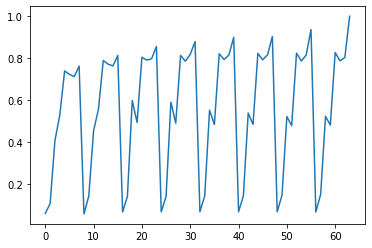

In [10]:
plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lst[-1]) for lst in valueHough for i in lst]).reshape(100,64)).mean())


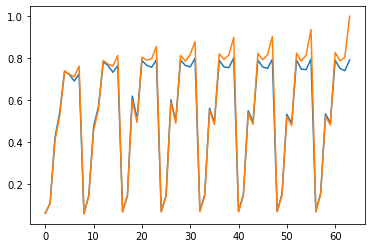

In [35]:
plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lstR) for lstH, lstR in zip(valueHough, targetRansac) for i in lstH]).reshape(100,64)).mean())
plt.plot(pd.DataFrame(np.array([normalized_mutual_info_score(i, lst[-1]) for lst in valueHough for i in lst]).reshape(100,64)).mean())


plt.show()